# Series de tiempo

Valores consecutivos organizados cronologicamente, capturando cambios en intervalos regulares (segundos, horas, dìas, etc.). Se usan para anlizar patrones, tndencias y prever valores futuros en diversas disciplinas

Ejemplos:
Datos económicos, climáticos, tráfico, ventas y demográficos.

### Técnicas de modelado
- Promedios móviles
- Suavizamiento exponencial
- Modelos AR, ARMA, ARIMA
- Modelos de regresión
- Modelos de redes neuronales recurrentes

### Tipos de análisis
1. Componente de tendencia
2. Componente estacional
3. Componente cíclico
4. Componente irregular

### Estacionaridad
Un modelo es estacionario si propiedades estadísticas se mantiene constantes a lo largo del tiempo. 
Media, varianza y función de autocorrelación (ACF) constantes.

### Función de Autocorrelación (ACF)
Herramienta estadística utilizada en el análisis de series de tiempo para medir la correlación entre un valor en una serie y sus valores pasados a diferentes intervalos de tiempo.

### Modelos Autoregresivos (AR)
Herramienta estadística que modelan una variable en función de sus valores pasados. Cada valr se xpresa como una combinación lineal de sus valores anteriores, más un término de error.

*Ejercicio:* Manchas solares y media móvil

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
url = 'https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/sunspot.csv'
df = pd.read_csv(url, sep= ';', header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1992,1,1,1992.001,186,0,186,14.3,1.0,14.3,19,-1,-1,1
1,1992,1,2,1992.004,190,18,172,8.2,2.6,7.8,21,-1,-1,1
2,1992,1,3,1992.007,234,26,208,18.3,6.1,17.2,21,-1,-1,1
3,1992,1,4,1992.010,243,54,189,14.8,7.0,13.0,20,-1,-1,1
4,1992,1,5,1992.012,242,58,184,13.8,6.8,12.0,18,-1,-1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10897 entries, 0 to 10896
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10897 non-null  int64  
 1   1       10897 non-null  int64  
 2   2       10897 non-null  int64  
 3   3       10897 non-null  float64
 4   4       10897 non-null  int64  
 5   5       10897 non-null  int64  
 6   6       10897 non-null  int64  
 7   7       10897 non-null  float64
 8   8       10897 non-null  float64
 9   9       10897 non-null  float64
 10  10      10897 non-null  int64  
 11  11      10897 non-null  int64  
 12  12      10897 non-null  int64  
 13  13      10897 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.2 MB


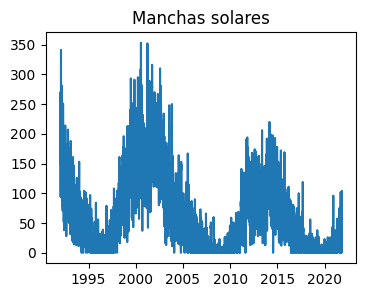

In [9]:
plt.figure(figsize = (4,3))
plt.plot(df[3], df[4])
plt.title('Manchas solares')
plt.show()

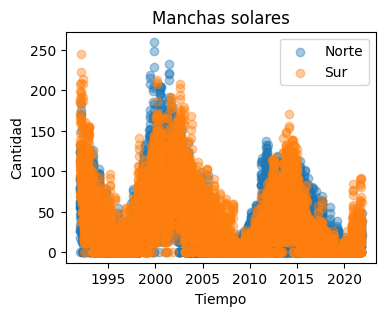

In [15]:
plt.figure(figsize = (4,3))
plt.scatter(df[3], df[5], label= 'Norte', alpha= 0.4)
plt.scatter(df[3], df[6], label= 'Sur', alpha= 0.4)
plt.title('Manchas solares')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

## Media Móvil
Manera de considerar una cantidad de puntos con alta dispersión mediante una suavización de los datos. La media móvil es una serie de tiempo

In [17]:
# Cada diez(window = 10)  datos los va promediando
df[5].rolling(window= 10).mean() 

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
10892     4.3
10893     5.4
10894     7.7
10895    11.6
10896    15.8
Name: 5, Length: 10897, dtype: float64

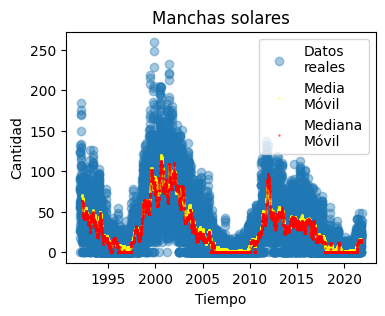

In [27]:
plt.figure(figsize = (4,3))
plt.scatter(df[3], df[5], label= 'Datos\nreales', alpha= 0.4)
plt.scatter(df[3], df[5].rolling(window= 100).mean(), label= 'Media\nMóvil', alpha= 0.4, s=1, color= 'yellow')
plt.scatter(df[3], df[5].rolling(window= 100).median(), label= 'Mediana\nMóvil', alpha= 0.4, s=1, color= 'red')
plt.title('Manchas solares')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

In [28]:
# Raiz del total de datos es un referente para definir umbrales de trabajo, en este caso, la ventana
np.sqrt(len(df))

104.38869670610895

In [21]:
df[5].mean() # La media es un valor

30.104157107460768

### Modelos de autoregresión 
*Se usa la librería  stats model*

Pasos a seguir:
1. Graficar la serie de tiempo.
2. Verificamos la estacionaridad.
3. Determinamos el parámetro para el modelo autoregresivo.
4. Entrenar el modelo para hacer predicciones.

In [29]:
from statsmodels.tsa.ar_model import AutoReg

In [32]:
# Para este ejercicio tomamos datos del consumo eléctrico en Alemania
url = 'https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/opsd_germany_daily.csv'
df2 = pd.read_csv(url)
df2.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [35]:
df2.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [36]:
df2.Date[0]

'2006-01-01'

In [39]:
df2.Date = pd.to_datetime(df2.Date, format= '%Y-%m-%d')

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


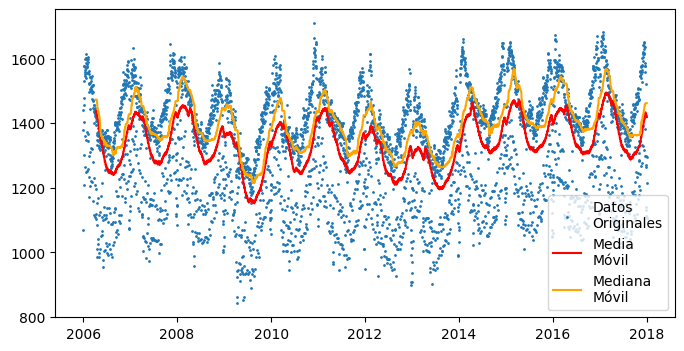

In [50]:
plt.figure(figsize= (8,4))
plt.scatter(df2.Date, df2.Consumption, label= 'Datos\nOriginales', s= 1)
plt.plot(df2.Date, df2.Consumption.rolling(window=100).mean(), label= 'Media\nMóvil', color= 'red')
plt.plot(df2.Date, df2.Consumption.rolling(window=100).median(), label= 'Mediana\nMóvil', color= 'orange')
plt.legend()
plt.show()

In [43]:
np.sqrt(len(df2))

66.20422947214173

### Estacionaridad ( Prueba de Fuller )

In [51]:
from statsmodels.tsa.stattools import adfuller

In [53]:
fuller_test = adfuller( df2.Consumption, autolag= 'AIC')
fuller_test[1] # Muestra el p-valor

4.7440549018423125e-08

Si el p-valor es menor que 0.05 los datos tienen **estacionaridad**

### Análisis de autocorrelación

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf # Función de autocorrelación parcial

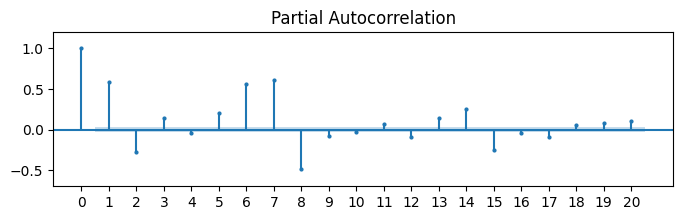

In [59]:
fig, ax = plt.subplots( figsize = (8,2) )
pact = plot_pacf(df2.Consumption, lags = 20, ax= ax, markersize = 2)
ax.set_ylim( -0.7, 1.2)
ax.set_xticks(range(21))
plt.show()